<a href="https://colab.research.google.com/github/inachenyx/GZPeite/blob/main/S100flowrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

flow rate (ml/h) is: [ 49.416  92.892 140.448 187.476 232.872 278.388 327.42  380.004 417.108
 462.612 551.34  644.724 734.76  826.14  922.26 ]


(0.0, 1000.0)

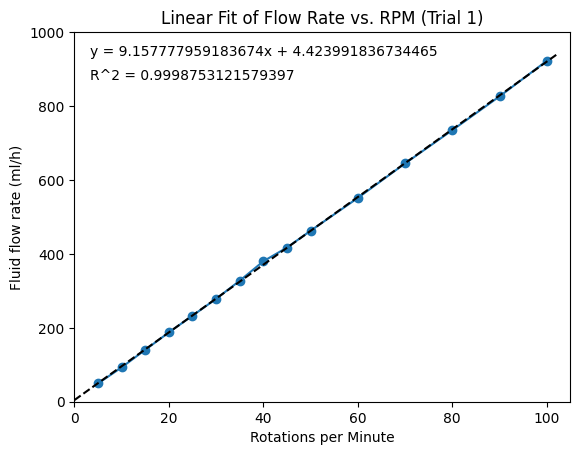

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

w1 = np.array([0.9395, 0.9351, 0.9566, 0.9560, 0.9488, 1.7211, 1.6892, 1.6890,
               1.7035, 1.7108, 3.5305, 3.4235, 3.4750, 3.4452, 3.5238])

w2 = np.array([1.3513, 1.7092, 2.1270, 2.5183, 2.8894, 4.0410, 4.4177, 4.8557,
               5.1794, 5.5659, 8.1250, 8.7962, 9.5980, 10.3297, 11.2093])
dw1 = np.subtract(w2,w1) # (ml/30s)
vpm1 = dw1 * 2 # (ml/min)
vph1 = vpm1 * 60 # (ml/hour)
print(f'flow rate (ml/h) is: {vph1}')

rpm = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph1, marker='o')

slope1, intercept1 = np.polyfit(rpm, vph1, 1)
plt.figtext(0.15, 0.83, f'y = {slope1}x + {intercept1}')

poly1d_fn1 = np.poly1d([slope1, intercept1])
r_sq1 = r2_score(vph1, poly1d_fn1(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq1}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn1(x), '--k')
plt.xlabel('Rotations per Minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('Linear Fit of Flow Rate vs. RPM (Trial 1)')
plt.xlim(0, 105)
plt.ylim(0,1000)

flow rate in (ml/h) is: [ 49.632  91.608 136.896 182.028 228.72  275.496 321.708 364.98  411.828
 454.02  542.484 626.076 716.112 810.972 902.124]


(0.0, 1000.0)

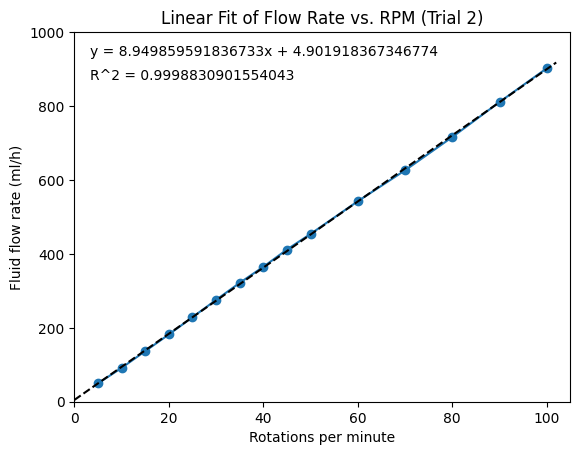

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

w0 = np.array([0.9447, 0.9365, 0.9506, 0.9565, 0.9493, 1.6986, 1.7165, 1.6994,
               1.6920, 1.6804, 3.5661, 3.2763, 3.4425, 3.5682, 3.4308])

w = np.array([1.3583, 1.6999, 2.0914, 2.4734, 2.8553, 3.9944, 4.3974, 4.7409,
               5.1239, 5.4639, 8.0868, 8.4936, 9.4101, 10.3263, 10.9485])
dw = np.subtract(w,w0) # (ml/30s)
vpm = dw * 2 # (ml/min)
vph = vpm * 60 # (ml/hour)
print(f'flow rate in (ml/h) is: {vph}')

rpm = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph, marker='o')

slope, intercept = np.polyfit(rpm, vph, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(vph, poly1d_fn(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('Linear Fit of Flow Rate vs. RPM (Trial 2)')
plt.xlim(0, 105)
plt.ylim(0,1000)

In [ ]:
new_v = [0.1, 50, 100, 200, 500, 1000, 1500] # test fluid speeds
new_rpm = [(y - intercept) / slope for y in new_v]
print(np.array(new_rpm).tolist()) # test rpm settings

[-0.5365356090867233, 5.038970854222975, 10.625650677178584, 21.799010323089803, 55.31908926082346, 111.18588749037956, 167.05268571993565]


In [ ]:
v_min = slope * 5 + intercept # min RPM is 5
print(f'Minimum fluid speed available is {v_min} ml/h')
t_run = 0.1/v_min * 60 * 60
print(f'Run at 5 rpm for {t_run} sec, then stop for {3600 - t_run} sec.')

Minimum fluid speed available is 49.65121632653044 ml/h
Run at 5 rpm for 7.250577662236222 sec, then stop for 3592.749422337764 sec.


In [ ]:
r_max = 100 # max RPM for roller pump
v_max = slope * r_max + intercept
print(f'Maximum fluid speed available is {v_max} ml/h')
t_run = 7/v_max * 60 * 60
print(f'Run at {r_max} rpm for {t_run} sec, which is {t_run/60} min.')

Maximum fluid speed available is 899.88787755102 ml/h
Run at 100 rpm for 28.00348868859083 sec, which is 0.46672481147651385 min.


In [ ]:
# weight test_activity
w_test0_1 = 1.0334-0.9377;
err = (w_test0_1 - 0.1)/0.1
print(f'Target 0.1mL measured {w_test0_1}, error {err * 100:.2f}%')

wt1 = [(0.9454, 1.6936, 0.9363, 1.6803, 3.3960, 3.5961)]
wt2 = [(1.3278, 2.5073, 2.5844, 5.8151, 9.3356, 10.3569)]
d_wt = np.subtract(wt2,wt1) # (ml/30s)
vtpm = d_wt * 2 # (ml/min)
vtph = vtpm * 60 # (ml/hour)
print(f'flow rate in (ml/h) is: {vtph}')

errs = [(f'{(vtph[0][0]-50)/50* 100:.2f}%', f'{(vtph[0][1]-100)/100* 100:.2f}%',
         f'{(vtph[0][2]-200)/200* 100:.2f}%', f'{(vtph[0][3]-500)/500* 100:.2f}%',
         f'{(vtph[0][4]-1000)/1000* 100:.2f}%', f'{(vtph[0][5]-1500)/1500* 100:.2f}%')]
print(errs)


Target 0.1mL measured 0.09570000000000012, error -4.30%
flow rate in (ml/h) is: [[ 45.888  97.644 197.772 496.176 712.752 811.296]]
[('-8.22%', '-2.36%', '-1.11%', '-0.76%', '-28.72%', '-45.91%')]


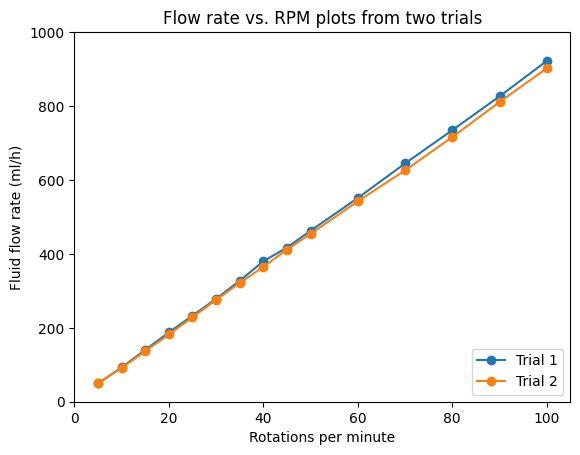

In [ ]:
plt.plot(rpm, vph1, '-o', label='Trial 1')
plt.plot(rpm, vph, '-o', label='Trial 2')
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('Flow rate vs. RPM plots from two trials')
plt.xlim(0, 105)
plt.ylim(0,1000)
plt.legend(loc='lower right')

2rpm has flow rate 51.34800000000002 ml/h
5rpm has flow rate 126.41999999999999 ml/h
25rpm has flow rate 586.056 ml/h
40rpm has flow rate 947.7240000000002 ml/h
70rpm has flow rate 1656.984 ml/h
100rpm has flow rate 2478.7080000000005 ml/h


(0.0, 2600.0)

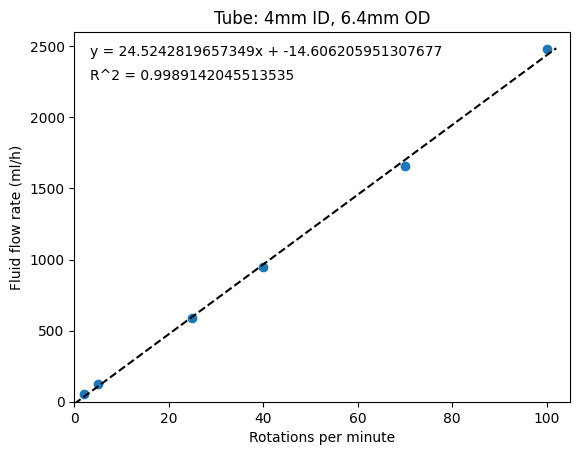

In [ ]:
# After changing tube to 4mm inner diameter
import matplotlib.pyplot as plt
print(f'2rpm has flow rate {(2.1375-1.7096)*2*60} ml/h')
print(f'5rpm has flow rate {(2.7619-1.7084)*2*60} ml/h')
print(f'25rpm has flow rate {(6.5788-1.6950)*2*60} ml/h')
print(f'40rpm has flow rate {(6.0777+5.2526-1.7090-1.7236)*2*60} ml/h')
print(f'70rpm has flow rate {(13.3663+7.3657-3.5305-3.3933)*2*60} ml/h')
print(f'100rpm has flow rate {(10.3848-3.4995)*6*60} ml/h')
xt = [2,5,25,40,70,100]
yt = [51.348, 126.419, 586.056, 947.724, 1656.984, 2478.708]
plt.plot(xt, yt,"o")
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('Tube: 4mm ID, 6.4mm OD')

slope, intercept = np.polyfit(xt, yt, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(yt, poly1d_fn(xt))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlim(0, 105)
plt.ylim(0,2600)


flow rate trial 2 in (ml/h) is: [ 49.632  91.608 136.896 182.028 228.72  275.496 321.708 364.98  411.828
 454.02  542.484 626.076 716.112 810.972 902.124]
flow rate trial 1 in (ml/h) is: [ 49.416  92.892 140.448 187.476 232.872 278.388 327.42  380.004 417.108
 462.612 551.34  644.724 734.76  826.14  922.26 ]


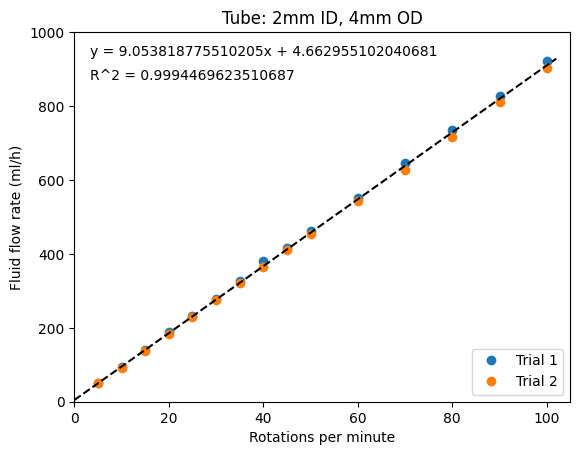

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

w0 = np.array([0.9447, 0.9365, 0.9506, 0.9565, 0.9493, 1.6986, 1.7165, 1.6994,
               1.6920, 1.6804, 3.5661, 3.2763, 3.4425, 3.5682, 3.4308])

w = np.array([1.3583, 1.6999, 2.0914, 2.4734, 2.8553, 3.9944, 4.3974, 4.7409,
               5.1239, 5.4639, 8.0868, 8.4936, 9.4101, 10.3263, 10.9485])
dw = np.subtract(w,w0) # (ml/30s)
vpm = dw * 2 # (ml/min)
vph = vpm * 60 # (ml/hour)
print(f'flow rate trial 2 in (ml/h) is: {vph}')

w1 = np.array([0.9395, 0.9351, 0.9566, 0.9560, 0.9488, 1.7211, 1.6892, 1.6890,
               1.7035, 1.7108, 3.5305, 3.4235, 3.4750, 3.4452, 3.5238])

w2 = np.array([1.3513, 1.7092, 2.1270, 2.5183, 2.8894, 4.0410, 4.4177, 4.8557,
               5.1794, 5.5659, 8.1250, 8.7962, 9.5980, 10.3297, 11.2093])
dw1 = np.subtract(w2,w1) # (ml/30s)
vpm1 = dw1 * 2 # (ml/min)
vph1 = vpm1 * 60 # (ml/hour)
print(f'flow rate trial 1 in (ml/h) is: {vph1}')

rpm = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph1, 'o' , label='Trial 1')
plt.plot(rpm, vph, 'o', label='Trial 2')

vpha = (vph + vph1)/2
slope, intercept = np.polyfit(rpm, vpha, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(vph, poly1d_fn(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
# plt.title('Linear Fit of Average Flow Rate vs. RPM')
plt.title('Tube: 2mm ID, 4mm OD')
plt.xlim(0, 105)
plt.ylim(0,1000)
plt.legend(loc='lower right')